In [1]:
from astropy.io import fits
from astropy.table import Table
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm

In [2]:
!ls

disperse
disperse_02
DisPerSe.ipynb
disperse_sdss7_coma_2D.ipynb
disperse_sdss7_coma.ipynb
DR5_cluster-catalog_v1.1.fits
README.md
SDSS7_coma_2D_ascii.txt
SDSS7_coma_2D_ascii.txt.NDnet
SDSS7_coma_2D_ascii.txt.NDnet.MSC
SDSS7_coma_2D_ascii.txt.NDnet_s5.up.NDskl
SDSS7_coma_2D_ascii.txt.NDnet_s5.up.NDskl.S001.a.NDskl
SDSS_DR16.csv
SDSS_DR7.csv
test_smooth.dat
visual.ipynb


In [3]:
galaxies = pd.read_csv('SDSS_DR7.csv')

In [4]:
galaxies = galaxies.loc[galaxies['z'] <= 0.3]
galaxies = galaxies.loc[galaxies['z'] > 0]
galaxies = galaxies.loc[galaxies['petroMag_r'] <= 17.77]
galaxies = galaxies.loc[galaxies['zWarning'] == 0]
galaxies = galaxies.loc[galaxies['zConf'] > 0.35]
galaxies.columns = ['RA', 'DEC', 'Z', 'CX', 'CY', 'CZ', 'zErr', 'zConf', 'zWarning', 'type', 'petroMag_r']
galaxies_rdz = galaxies[['RA', 'DEC', 'Z']]

In [5]:
galaxies

,RA,DEC,Z,CX,CY,CZ,zErr,zConf,zWarning,type,petroMag_r
0,146.71421,-1.041304,0.021314,-0.835805,0.548725,-0.018173,0.000175,0.998538,0,3.0,14.86596
1,146.91945,-0.990492,0.213991,-0.837779,0.545736,-0.017286,0.000130,0.999355,0,3.0,17.73796
3,146.85983,-0.808902,0.126660,-0.837252,0.546635,-0.014118,0.000165,0.999525,0,3.0,17.45244
5,146.96390,-0.545003,0.055956,-0.838289,0.545143,-0.009512,0.000095,0.932335,0,3.0,17.39276
7,146.60721,-1.240753,0.090659,-0.834721,0.550247,-0.021654,0.000147,0.999779,0,3.0,16.49320
...,...,...,...,...,...,...,...,...,...,...,...
1599442,260.74317,31.944035,0.033893,-0.136500,-0.837515,0.529091,0.000157,0.999611,0,3.0,16.19189
1599444,260.80058,31.898992,0.159699,-0.135728,-0.838061,0.528423,0.000150,0.999659,0,3.0,17.39783
1599445,260.71601,32.024276,0.167412,-0.136778,-0.836718,0.530279,0.000139,0.999942,0,3.0,16.92561
1599446,260.69724,32.285628,0.111586,-0.136659,-0.834277,0.534140,0.000154,0.999824,0,3.0,16.59268


In [6]:
galaxies_rdz

,RA,DEC,Z
0,146.71421,-1.041304,0.021314
1,146.91945,-0.990492,0.213991
3,146.85983,-0.808902,0.126660
5,146.96390,-0.545003,0.055956
7,146.60721,-1.240753,0.090659
...,...,...,...
1599442,260.74317,31.944035,0.033893
1599444,260.80058,31.898992,0.159699
1599445,260.71601,32.024276,0.167412
1599446,260.69724,32.285628,0.111586


In [7]:
coma_ra_int = (140, 255)
coma_dec_int = (-10, 65)
coma_z_int = (0.010, 0.040)

coma = galaxies_rdz[
        (coma_ra_int[0] < galaxies_rdz['RA']) & (galaxies_rdz['RA'] < coma_ra_int[1]) & \
        (coma_dec_int[0] < galaxies_rdz['DEC']) & (galaxies_rdz['DEC'] < coma_dec_int[1]) & \
        (coma_z_int[0] < galaxies_rdz['Z']) & (galaxies_rdz['Z'] < coma_z_int[1])
    ]
coma.reset_index(drop=True, inplace=True)

In [8]:
coma

,RA,DEC,Z
0,146.71421,-1.041304,0.021314
1,146.75170,-0.408392,0.035831
2,146.29988,-0.120014,0.030657
3,146.30086,0.035480,0.021753
4,146.35579,-0.143388,0.030778
...,...,...,...
42821,245.41565,19.000255,0.034946
42822,245.91614,18.933752,0.036570
42823,246.13253,19.132490,0.035394
42824,246.11436,19.482573,0.034994


In [9]:
with open('SDSS7_coma_2D_ascii.txt', 'w') as coma_f:
    coma_f.write('# px py\n')
    for i in range(coma.shape[0]):
        t = coma.iloc[i]
        coma_f.write(f'{t.RA}\t{t.DEC}\n')

In [10]:
!disperse_02/bin/delaunay_2D SDSS7_coma_2D_ascii.txt -btype smooth -smooth 1


reading SDSS7_coma_2D_ascii.txt (ASCII) ... done. (42826 lines)
Margin set to 0.01869 (actual size is ~2.15272).
Tesselating 42826 particles (2D) ... (+0 in boundary)
         Some points have identical coordinates !
 done. (0.04s elapsed)
Circumsphere test was skipped.
Computing density ... done.
Building smooth boundaries (178 guards):  tesselation ...  generating ... cleaning up ... done. (+1496 particles)
Adding 1496 particles ... done.
Computing density ... done.
All done in 0.07 s.
Converting tesselation to NDnetwork ... done.
Smoothing 1 times ... done.
Will write network to file 'SDSS7_coma_2D_ascii.txt.NDnet'.
All done.

Network was saved as : SDSS7_coma_2D_ascii.txt.NDnet
   comment: 'No cosmological conversion.'
   2D-Network has 42209 vertices.
   periodicity: non-periodic.
   Available faces: 126030 1-F, 83820 2-F.
   Bounding box: x0=[139.9,-3.81703],
                 delta=[115.18,68.9231].
   Available fields: 'field_value'(0), 'log_field_value'(0), 'mass'(0)
         

In [11]:
!disperse_02/bin/mse SDSS7_coma_2D_ascii.txt.NDnet -upSkl -nsig 3


****** MSE v0.9.24 (64 bits) ******
Will read network from file 'SDSS7_coma_2D_ascii.txt.NDnet'.
Loading 2D network from file "SDSS7_coma_2D_ascii.txt.NDnet" ... done.
Computing 2-faces lists for vertice ... done.
Building mask ... done. (715 1-faces on boundary)
*********************************
Starting Morse-Smale complex computation.
Computing discrete gradient for 252059 cells:
   Identifying (1,2)-cell pairs:
      Sorting 126030 1-cells (asc.) ... done.
      Computing MST ... (components) done.(1615/83820 comp.)
      Computing discrete Gradient (1615 comp.) ... done.
   Identifying (1,0)-cell pairs:
      Computing MST ... (components) done.(3206/42209 comp.)
      Computing discrete Gradient (3206 comp.) ... done.
   Critical cells : 3206(+0) 0-cells, 4819(+4819) 1-cells, 1615(+0) 2-cells.
Computing discrete Morse-Smale complex: 
    9640 critical points: 1615 min, 4819 s1, 3206 max.
    * minima: SKIPPED.
    * 1-saddle: no manifolds, A.(G+)/D.(G+) arcs ... done.
    * maxi

In [12]:
!disperse_02/bin/skelconv SDSS7_coma_2D_ascii.txt.NDnet_s3.up.NDskl -smooth 1 -to NDskl_ascii

Will read skeleton from file 'SDSS7_coma_2D_ascii.txt.NDnet_s3.up.NDskl'.
Loading 2D skeleton from file SDSS7_coma_2D_ascii.txt.NDnet_s3.up.NDskl ... done.
Smoothing skeleton 1 times ... done.
Will write skeleton to file 'SDSS7_coma_2D_ascii.txt.NDnet_s3.up.NDskl.S001.a.NDskl'.
Saving 2D skeleton to ASCII file SDSS7_coma_2D_ascii.txt.NDnet_s3.up.NDskl.S001.a.NDskl ... done.


In [13]:
def read_skl_ascii_RaDecZ(file_name):
    cps = []
    fils = []
    with open(file_name) as f:
        s = ''
        while s != '[CRITICAL POINTS]':
            s = f.readline().strip()
        cp_num = int(f.readline().strip())
        for i in range(cp_num):
            cp = {}
            type_, ra, dec, _, _, _ = tuple(map(float, f.readline().split()))
            cp['RA'] = ra
            cp['DEC'] = dec
            cp['type'] = int(type_)
            cps.append(cp)
            for i in range(int(f.readline())):
                f.readline()
        
        while s != '[FILAMENTS]':
            s = f.readline().strip()
        fil_num = int(f.readline())
        for i in range(fil_num):
            fil = {}
            cp1, cp2, sp_num = tuple(map(int, f.readline().split()))
            fil['CP1_id'] = cp1
            fil['CP2_id'] = cp2
            fil['sample_points'] = []
            for j in range(sp_num):
                fil['sample_points'].append(tuple(map(float, f.readline().split())))
            fils.append(fil)
            
    return cps, fils

In [14]:
cps, fils = read_skl_ascii_RaDecZ('SDSS7_coma_2D_ascii.txt.NDnet_s3.up.NDskl.S001.a.NDskl')

In [15]:
cps[0]

{'RA': 155.476, 'DEC': 23.6661, 'type': 2}

100%|██████████| 217/217 [00:00<00:00, 2562.49it/s]
No handles with labels found to put in legend.


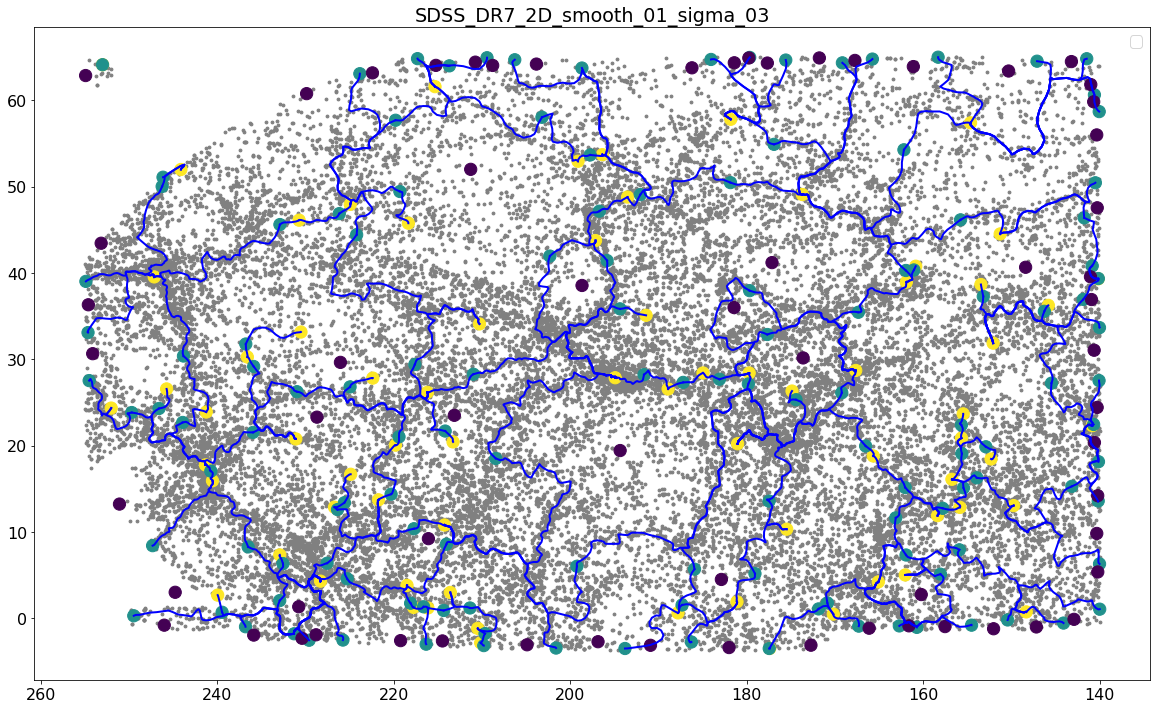

In [24]:
font = {'size': 16}
plt.rc('font', **font)
fig = plt.figure(figsize=(20, 12))

plt.scatter(coma['RA'], coma['DEC'], c='grey', s=8)

x = []
y = []
c = []
for cp in cps:
    x.append(cp['RA'])
    y.append(cp['DEC'])
    c.append(cp['type'])

for fil in tqdm(fils):
    points = fil['sample_points']
    x_f = []
    y_f = []
    for i in range(len(points)):
        x_f.append(points[i][0])
        y_f.append(points[i][1])
    plt.plot(x_f, y_f, 'b', linewidth=2)
    
plt.scatter(x, y, c=c, s=150)
    
ax = fig.get_axes()
ax[0].invert_xaxis()
plt.title('SDSS_DR7_2D_smooth_01_sigma_03')
plt.savefig('2D_smooth_01_s_03')